Upload the Dataset

In [5]:
from google.colab import files
uploaded=files.upload()

Saving Test.csv to Test.csv


Load the Dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


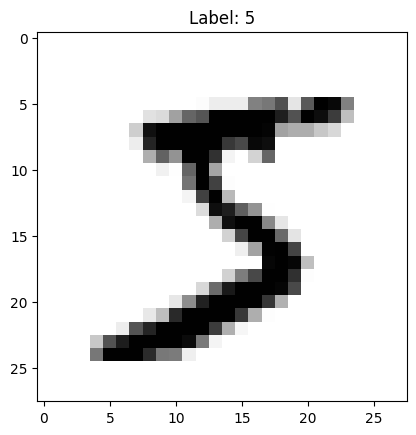

In [4]:


import tensorflow as tf
from tensorflow.keras import datasets

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the pixel values to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display the shape of the data
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)

# You can also check one sample to visualize an image
import matplotlib.pyplot as plt

# Display the first training image
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(f"Label: {train_labels[0]}")
plt.show()




Data Exploration

In [ ]:
#display first few roes
df.head()

,"POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE"
0,"Owner,0,0,1,BHK,545.1713396,1,1,""Kamrej,Surat""..."
1,"Dealer,1,1,2,BHK,800.0,0,0,""Panvel,Lalitpur"",1..."
2,"Dealer,0,0,2,BHK,1257.0965130000002,1,1,""New T..."
3,"Dealer,0,0,3,BHK,1400.329489,1,1,""Kalwar Road,..."
4,"Owner,0,0,1,BHK,430.47783039999996,1,1,""Mai Ma..."


In [ ]:
#Shape of the dataset
print("shape:",df.shape)
#column names
print("column:",df.columns.tolist())
#Data types and non-null values
df.info()
#summary statistics for numeric features
df.describe()

shape: (68720, 1)
column: ['POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 1 columns):
 #   Column                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                         --------------  ----- 
 0   POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE  68720 non-null  object
dtypes: object(1)
memory usage: 537.0+ KB


,"POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE"
count,68720
unique,66250
top,"Dealer,0,1,3,BHK,1000.0,1,1,""Sector 84 Faridab..."
freq,18


Check for Missing Values and Duplicates

In [ ]:
#check for missing values
print (df.isnull().sum())
#check for duplicates
print("Duplicate rows:",df.duplicated().sum())

POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE    0
dtype: int64
Duplicate rows: 2470


Visualize a Few Features

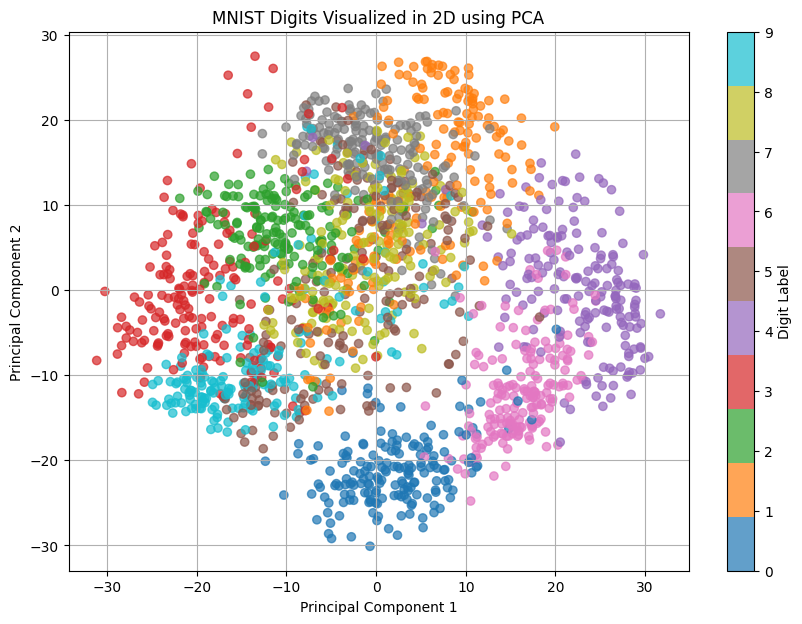

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Reduce dimensions to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the digits in 2D PCA space
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Digit Label')
plt.title('MNIST Digits Visualized in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



Identify Target and Features

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target  # Features and Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.975


Convert Categorical Columns to Numerical

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example dataset with categorical digit labels
data = pd.DataFrame({
    'pixel1': [0, 128, 255],
    'pixel2': [255, 128, 0],
    'digit_label': ['zero', 'one', 'two']  # Categorical
})

# Convert categorical labels to numeric
label_encoder = LabelEncoder()
data['digit_label_encoded'] = label_encoder.fit_transform(data['digit_label'])

print(data)


   pixel1  pixel2 digit_label  digit_label_encoded
0       0     255        zero                    2
1     128     128         one                    0
2     255       0         two                    1



One-Hot Encoding

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.8826 - loss: 0.3934
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9831 - loss: 0.0540
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9893 - loss: 0.0364
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9914 - loss: 0.0274
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9932 - loss: 0.0195
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0369
Test accuracy: 99.14%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


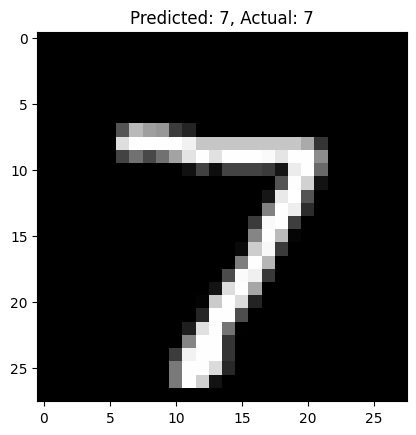

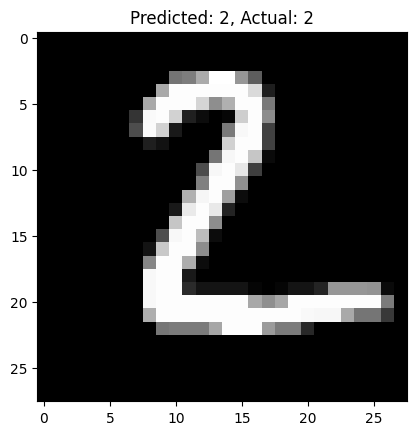

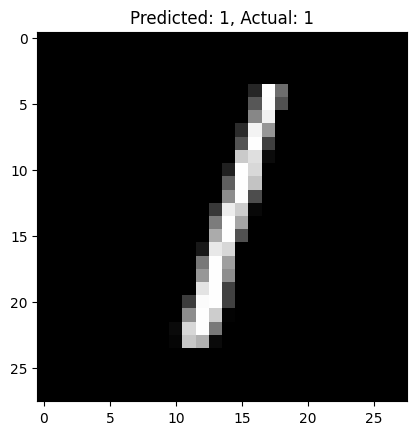

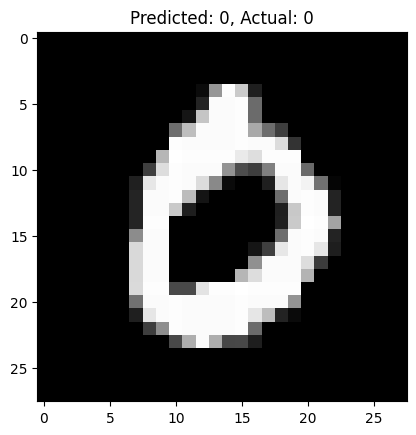

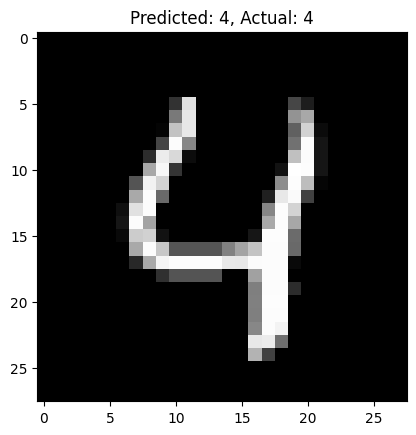

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to a range of [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-Hot Encode the labels
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Define a simple CNN model for digit classification
model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),  # Reshape input to 28x28x1 for CNN
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output neurons for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels_one_hot, epochs=5, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot)

print(f"Test accuracy: {test_acc * 100:.2f}%")

# Visualize some of the predictions
predictions = model.predict(test_images)

# Show the first 5 test images and their predicted labels
for i in range(5):
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {test_labels[i]}")
    plt.show()

Feature Scaling

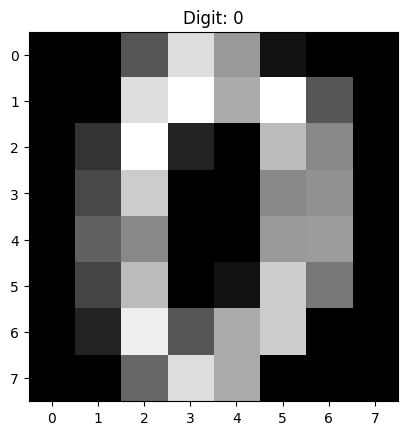

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the dataset
digits = load_digits()
data = digits.data
target = digits.target

# Initialize MinMaxScaler (scales features to the range [0, 1])
scaler = MinMaxScaler()

# Apply scaling to the features
scaled_data = scaler.fit_transform(data)

# Let's check the first image's scaled data
plt.imshow(scaled_data[0].reshape(8, 8), cmap='gray')
plt.title(f"Digit: {target[0]}")
plt.show()

Train-Test Split

In [ ]:

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Separate the features (X) and labels (y)
X = mnist.data
y = mnist.target

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (Standardize)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.74%


Model Building

In [ ]:
# Importing necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Support Vector Machine classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       0.96      0.96      0.96        54
           4       1.00      1.00      1.00        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.95      0.95      0.95        43
           9       0.97      0.97      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



Evaluation

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
digits = datasets.load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Standardize the dataset (scaling features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


Make Predictions from New Input

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        82
           1       0.96      0.98      0.97        89
           2       0.98      0.98      0.98        83
           3       1.00      0.88      0.94        93
           4       0.96      0.99      0.97        93
           5       0.97      0.93      0.95        99
           6       0.99      0.98      0.98        98
           7       0.93      0.99      0.96        87
           8       0.89      0.94      0.91        83
           9       0.91      0.92      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



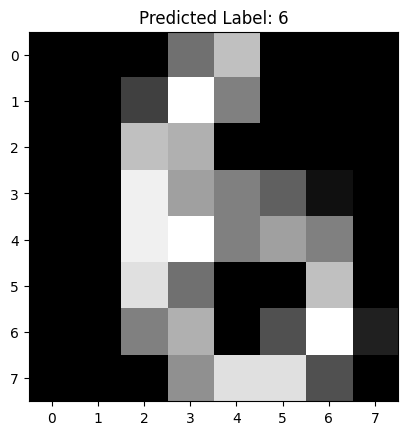

In [ ]:

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()
X = digits.images  # image data (8x8 pixel images)
y = digits.target  # target labels (0-9)

# Flatten the images to 1D arrays (8x8 = 64 pixels)
n_samples = len(X)
X_flat = X.reshape((n_samples, -1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.5, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Test the classifier
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot a sample image and the predicted label
plt.imshow(X_test[0].reshape(8, 8), cmap='gray')
plt.title(f"Predicted Label: {y_pred[0]}")
plt.show()

Convert to DataFrame and Encode

In [ ]:

import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder

# Load handwritten digits dataset
digits = load_digits()

# Convert to DataFrame
df = pd.DataFrame(digits.data)
df['label'] = digits.target

# Encode the label column (optional here as it's already numeric)
encoder = LabelEncoder()
df['encoded_label'] = encoder.fit_transform(df['label'])

print(df.head())

     0    1    2     3     4     5    6    7    8    9  ...   56   57   58  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  6.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  7.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     59    60    61   62   63  label  encoded_label  
0  13.0  10.0   0.0  0.0  0.0      0              0  
1  11.0  16.0  10.0  0.0  0.0      1              1  
2   3.0  11.0  16.0  9.0  0.0      2              2  
3  13.0  13.0   9.0  0.0  0.0      3              3  
4   2.0  16.0   4.0  0.0  0.0      4              4  

[5 rows x 66 columns]


Predict the Final Grade

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load data
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

# Train model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final Grade (Accuracy):", round(accuracy * 100, 2), "%")

Final Grade (Accuracy): 96.11 %


Deployment-Building an Interactive App

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Save the model
model.save('digit_recognition_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8615 - loss: 0.4767
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9574 - loss: 0.1491
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9670 - loss: 0.1085
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9735 - loss: 0.0851
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9765 - loss: 0.0724


Create a Prediction Function

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8814 - loss: 0.4303
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9642 - loss: 0.1224
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9770 - loss: 0.0787
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9825 - loss: 0.0567
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9869 - loss: 0.0428
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


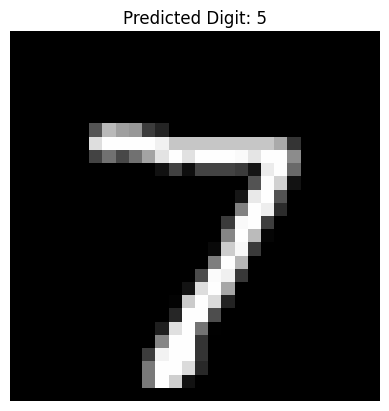

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

# Prediction function
def predict_digit(image):
    image = image.reshape(1, 28, 28) / 255.0  # Preprocess image
    prediction = model.predict(image)
    return np.argmax(prediction)

# Example usage
index = 0  # Change index to test other images
sample_image = x_test[index]
predicted = predict_digit(sample_image)

plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted Digit: {predicted}")
plt.axis('off')
plt.show()